# Import Necessary Libraries

In [114]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, f1_score, plot_roc_curve
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

from operator import itemgetter, attrgetter

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import missingno

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import os
import sys
ex_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if ex_path not in sys.path:
    sys.path.append(ex_path)

from src.helper_functions import *

----

# Import data
- Download data from Kaggle [Churn Modeling](https://www.kaggle.com/shivan118/churn-modeling-dataset)
- Upload data into data folder inside the repository.
- Data is a 668.81 KB zip file which can be unzipped from terminal. The best way to do is change the directory in terminal to where data will store, use unzip command following by uploaded data folder.
- The unzipped data is a single csv file which is ready to use.

### import data as csv file form data folder 

In [2]:
df_churn = pd.read_csv('../../data/Churn_Modelling.csv')

In [3]:
# checking the head of dataset 
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


----

### getting info of dataset

In [4]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Data Explanation 

- RowNumber: Numerical column
- CustomerId: Numerical column 
- Surname: Categorical column name of customers
- CreditScore: Numerical column 
- Geography: Categorical column region of three banks in Europe countries France, Germany and Spain.
- Gender: Categorical column Gender with Male and Female
- Age: Numerical column 
- Tenure: Numerical column
- Balance: Numerical column
- NumOfProducts: Numerical column 
- HasCrCard: Numerical column 
- IsActiveMember: Numerical column 
- EstimatedSalary: Numerical column 
- Exited: Numerical column which is the target for my prediction. This column is a binary where 0 is Stayed or Not churn and 1 Churned customers.

### Using hitmap to show the correlation between numerical columns and the target 

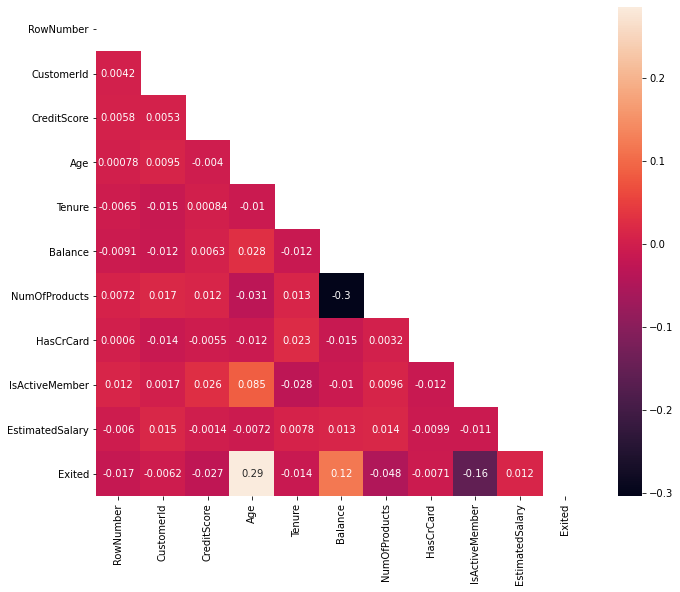

In [5]:
corr = df_churn.corr()
# The mask is not necessary, but corr() has duplicate values on either side of the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(df_churn.corr(), mask=mask, annot = True);

There are 3 numerical columns, Age,Balance and Gender whith the most correlation with the target(Exited).
I will show some future engineering on these columns.

### Distribution of Age vs target

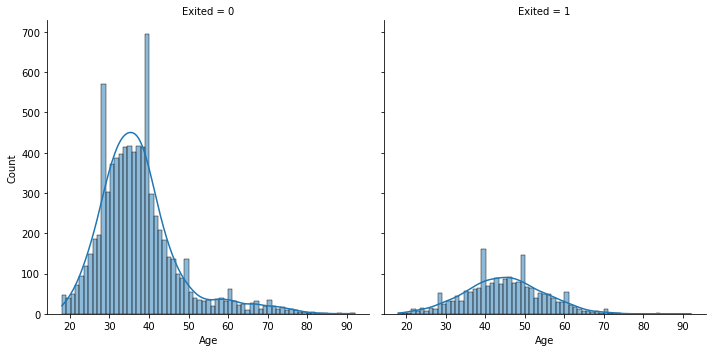

In [6]:
sns.displot(data=df_churn, x='Age', col='Exited', kde=True);
#plt.savefig('Age Contribution.png');

### Distribution of Balance vs target

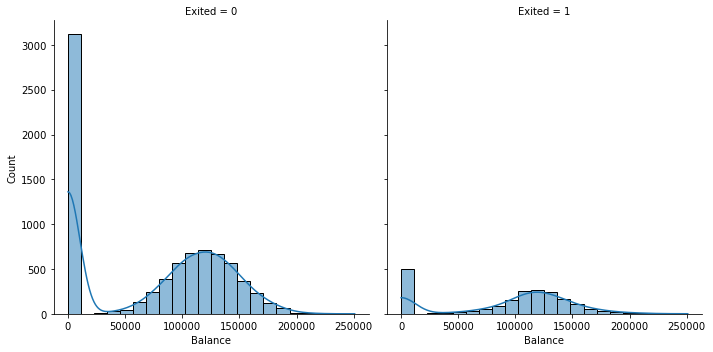

In [7]:
sns.displot(data=df_churn, x='Balance', col='Exited', kde=True);
#plt.savefig('Balance Contribution.png');

### Number of Male and Female in dataset

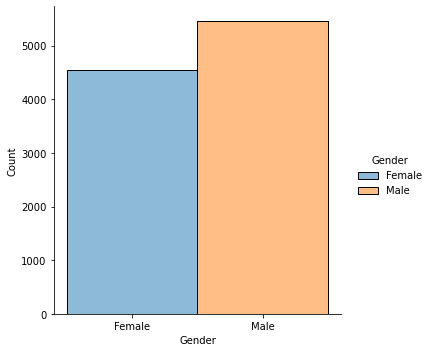

In [8]:
sns.displot(df_churn, x='Gender', hue='Gender');
#plt.savefig('Gender count.png')

### Number of customers in countries vs exited

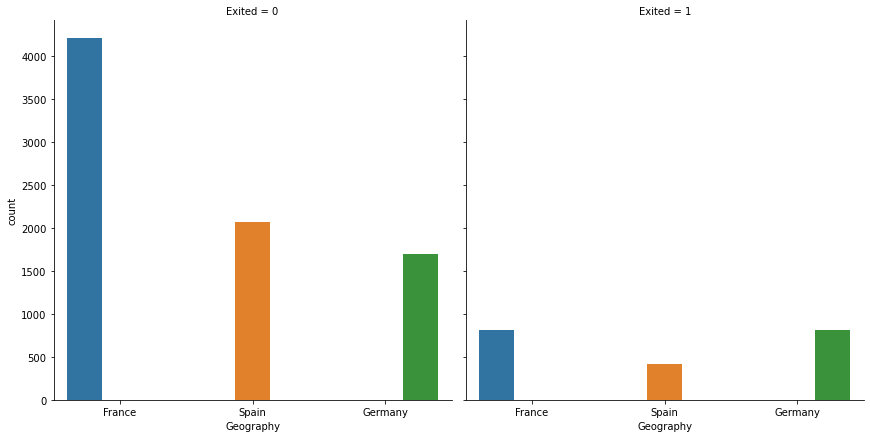

In [9]:
g = sns.catplot(x='Geography', hue='Geography', col='Exited',
                data=df_churn, kind="count",
                height=6, aspect=1);
#plt.savefig('Geography count.png')

### Number of Male=0 and Female=1 

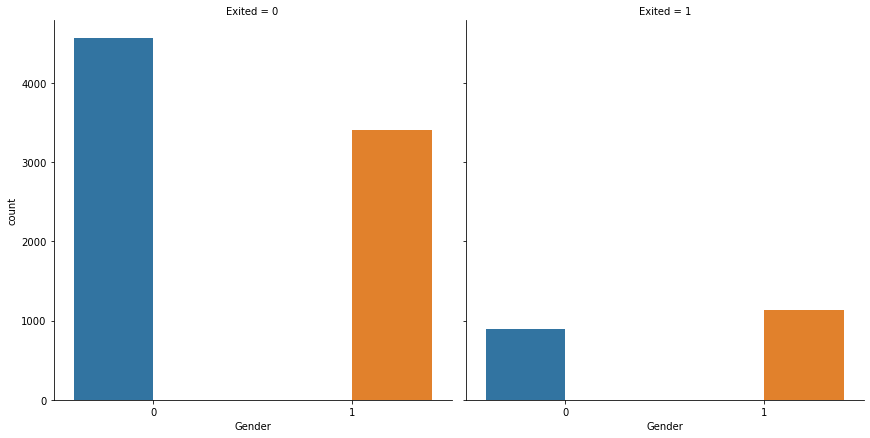

In [116]:
ge = sns.catplot(x='Gender', hue='Gender', col='Exited',
                data=df_churn, kind="count",
                height=6, aspect=1);
plt.savefig('Gender bar')

### Changing  Gender column from categorical to binary(Numerical)

In [11]:
df_churn['Gender'] = df_churn['Gender'].map({'Female': 1, 'Male': 0})
df_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


### Dropping unnecessary columns.

In [12]:
# These columns are just personal information about customers
df_churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


### Generate preview of entries with null values

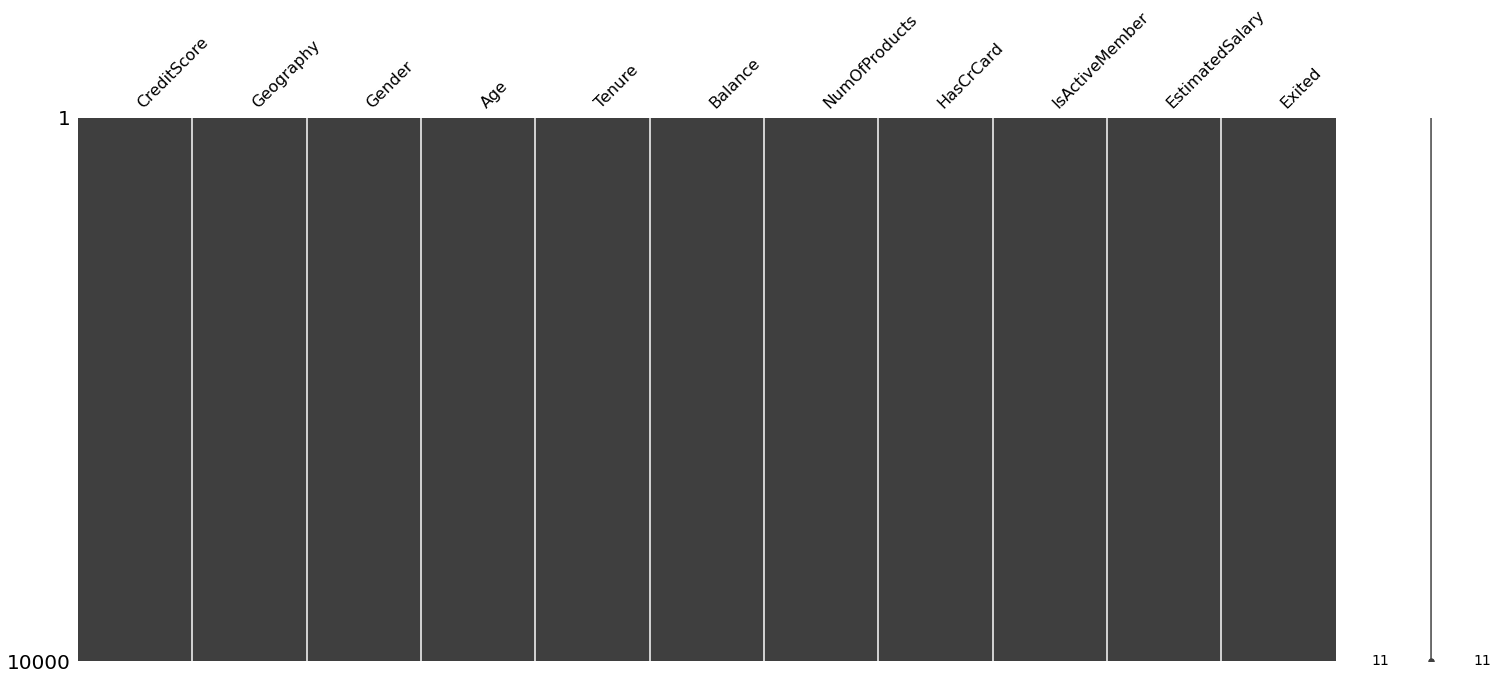


Preview of data with null values:
xxxxxxxxxxxxx
Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


In [13]:
if len(df_churn[df_churn.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df_churn[df_churn.isnull().any(axis=1)].head(3))
missingno.matrix(df_churn)
plt.show()
print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
print(df_churn[df_churn.isnull().any(axis=1)].head(3))

### Generate count statistics of duplicate entries

In [14]:

if len(df_churn[df_churn.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df_churn[df_churn.duplicated()]))
    print(df_churn[df_churn.duplicated(keep=False)].sort_values(by=list(df_churn.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


## It looks like we have Heavy Imbalance target 
- I will take care of this imbalance later 

In [15]:
df_churn.Exited.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

/Users/alirezakarimi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


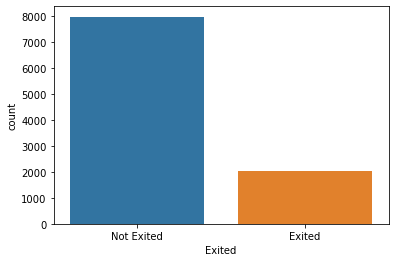

<Figure size 432x288 with 0 Axes>

In [18]:
imbal = sns.countplot(df_churn['Exited'])
imbal.set_xticklabels(['Not Exited','Exited'])
plt.show();
plt.savefig('Imbalance data')

In [19]:
df_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


### making Exited as our target 

In [20]:
# Dropping the original Exited column from data frame
X= df_churn.drop('Exited', axis=1)
y = df_churn.Exited

In [21]:
# type of data in our dataset
X.dtypes.value_counts()

int64      7
float64    2
object     1
dtype: int64

### split our dataset to training and test set.

In [22]:
# I do not touch the test set untill the last part 
# which is making the best training model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)
print(X_train.shape)
print(y_train.shape)

(8000, 10)
(8000,)


In [23]:
X_train.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

### Dealing with Categorical Columns 

In [24]:
# dropping the only object column 
# making dataset only numerical
X_tr_num = X_train.drop(['Geography'], axis=1)
X_tr_num

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,0,32,6,0.00,2,1,1,179093.26
1561,632,0,42,4,119624.60,2,1,1,195978.86
1670,559,0,24,3,114739.92,1,1,0,85891.02
6087,561,1,27,9,135637.00,1,1,0,153080.40
6669,517,0,56,9,142147.32,1,0,0,39488.04
...,...,...,...,...,...,...,...,...,...
5734,768,0,54,8,69712.74,1,1,1,69381.05
5191,682,1,58,1,0.00,1,1,1,706.50
5390,735,1,38,1,0.00,3,0,0,92220.12
860,667,0,43,8,190227.46,1,1,0,97508.04


### using One Hot Encoder to cahnge the only object(categorical) column to binary

In [25]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore') # instantiate the function

X_tr_cat = X_train[['Geography']] # use the numerical dataset

X_tr_oh = pd.DataFrame(ohe.fit_transform(X_tr_cat), columns=ohe.get_feature_names(X_tr_cat.columns), index=X_tr_cat.index) # create new dataset 
X_tr_ = X_tr_num.join(X_tr_oh) # join Two dataset
X_tr_

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
9254,686,0,32,6,0.00,2,1,1,179093.26,1.0,0.0,0.0
1561,632,0,42,4,119624.60,2,1,1,195978.86,0.0,1.0,0.0
1670,559,0,24,3,114739.92,1,1,0,85891.02,0.0,0.0,1.0
6087,561,1,27,9,135637.00,1,1,0,153080.40,1.0,0.0,0.0
6669,517,0,56,9,142147.32,1,0,0,39488.04,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,0,54,8,69712.74,1,1,1,69381.05,1.0,0.0,0.0
5191,682,1,58,1,0.00,1,1,1,706.50,1.0,0.0,0.0
5390,735,1,38,1,0.00,3,0,0,92220.12,1.0,0.0,0.0
860,667,0,43,8,190227.46,1,1,0,97508.04,1.0,0.0,0.0


### Scaling data train

In [26]:
# we scale our data to avoid the power of bigger numbers.
ss = StandardScaler() # instantiate the function
X_train_sc = pd.DataFrame(ss.fit_transform(X_tr_), index=X_tr_.index, columns=X_tr_.columns)
X_train_sc

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
9254,0.356500,-0.913248,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,1.001501,-0.579467,-0.576388
1561,-0.203898,-0.913248,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,-0.998501,1.725723,-0.576388
1670,-0.961472,-0.913248,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,-0.998501,-0.579467,1.734942
6087,-0.940717,1.094993,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,1.001501,-0.579467,-0.576388
6669,-1.397337,-0.913248,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,1.001501,-0.579467,-0.576388
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1.207474,-0.913248,1.435808,1.039728,-0.102301,-0.916688,0.649203,0.974817,-0.539860,1.001501,-0.579467,-0.576388
5191,0.314989,1.094993,1.816097,-1.389442,-1.218471,-0.916688,0.649203,0.974817,-1.733882,1.001501,-0.579467,-0.576388
5390,0.865009,1.094993,-0.085351,-1.389442,-1.218471,2.533560,-1.540351,-1.025834,-0.142765,1.001501,-0.579467,-0.576388
860,0.159323,-0.913248,0.390011,1.039728,1.827259,-0.916688,0.649203,-1.025834,-0.050826,1.001501,-0.579467,-0.576388


# Resampling to solve imbalance data
- using over sampling technique(Smote)

In [27]:
ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
X_ros, y_ros = ros.fit_resample(X_train_sc, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 6356, 1: 1644})
Resample dataset shape Counter({0: 6356, 1: 6356})


-----

# Models

# Making pipeline
- using pipeline to make our models
- with this pipeline, I can make all models and use this pipeline to predict our test set as well.

## Logistic Regression models
- first simple model
- I use this, because it's simple, fast and easy to interpretation.


In [28]:
# use all previous data engineering to make pipeline
pip_line_lg = Pipeline([
    ('Geography_ohe', ColumnTransformer([
        ('onehotencoding', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Geography'])
    ], remainder='passthrough')),
    ('scaler', StandardScaler()),
    ('sampling', RandomOverSampler(random_state=42)),
    ('lg', LogisticRegression(random_state=42))
])

In [29]:
# fitting model(pipeline) into train set
pip_line_lg.fit(X_train, y_train)

Pipeline(steps=[('Geography_ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('sampling', RandomOverSampler(random_state=42)),
                ('lg', LogisticRegression(random_state=42))])

In [30]:
# getting the average of f1 score 
cross_val_score(pip_line_lg, X_train, y_train, cv=3, scoring='f1').mean()

0.4893211212449431

In [31]:
# checking the accuracy score
cross_val_score(pip_line_lg, X_train, y_train, cv=3, scoring='accuracy')

array([0.69066367, 0.71541057, 0.71267817])

In [36]:
# using helper function to predict 
model_output(pip_line_lg, X_train, X_test, y_train, y_test)

The Cross Val f1 score is: 0.4893211212449431
The test Accuracy is: 0.717
[[1153  454]
 [ 112  281]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1607
           1       0.38      0.72      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.74      2000



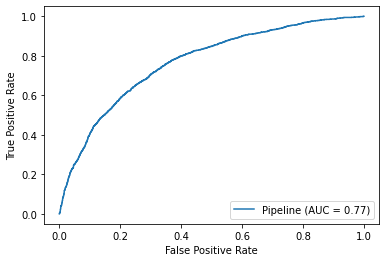

In [37]:
plot_roc_curve(pip_line_lg, X_train, y_train);

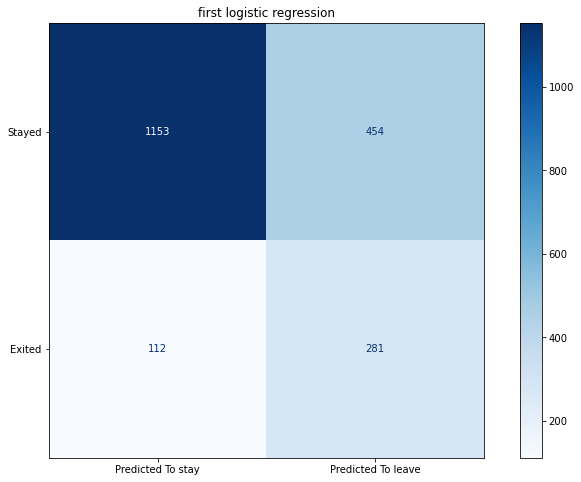

<Figure size 432x288 with 0 Axes>

In [117]:
confusion_matrix_info(pip_line_lg, X_test, y_test,'first logistic regression');
plt.savefig('first log')

In [39]:
# using pipeloine to make the secong logistic regression 
pip_line_lg1 = Pipeline([
    ('Geography_ohe', ColumnTransformer([
        ('onehotencoding', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Geography'])
    ], remainder='passthrough')),
    ('scaler', StandardScaler()),
    ('sampling', RandomOverSampler(random_state=42)),
    ('lg', LogisticRegression(C=.5, class_weight='balanced', random_state=42,  penalty='l1',solver='liblinear'))
])

In [40]:
# fitting model(pipeline) into train set
pip_line_lg1.fit(X_train, y_train)

Pipeline(steps=[('Geography_ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('sampling', RandomOverSampler(random_state=42)),
                ('lg',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [41]:
# getting the average of f1 score
cross_val_score(pip_line_lg1, X_train, y_train, cv=3, scoring='f1')

array([0.47558656, 0.51000646, 0.48178138])

In [42]:
# checking the accuracy score
cross_val_score(pip_line_lg1, X_train, y_train, cv=3, scoring='accuracy')

array([0.68991376, 0.71541057, 0.71192798])

In [43]:
# using helper function to predict 
model_output(pip_line_lg1, X_train, X_test, y_train, y_test)

The Cross Val f1 score is: 0.4891247963498229
The test Accuracy is: 0.717
[[1153  454]
 [ 112  281]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1607
           1       0.38      0.72      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.74      2000



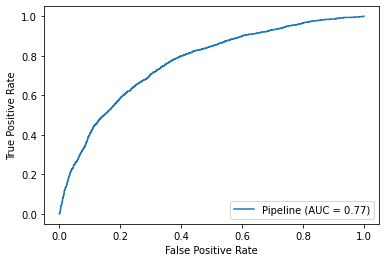

In [44]:
plot_roc_curve(pip_line_lg1, X_train, y_train);

----

# Decision Tree
- Makes the training time of decision tree faster.
- Because of its simplicty, it's easy to code, visualize, interpret, and manipulate simple decision tree.
- Decision tree follows a non-parametric methods.
- Can work on both caregorical and numerical data.

In [45]:
# using pipiline to make Decision Tree model 
pip_line_dectree = Pipeline([
    ('Geography_ohe', ColumnTransformer([
        ('onehotencoding', OneHotEncoder
         (sparse=False, handle_unknown='ignore'),
         ['Geography'])
    ], remainder='passthrough')),
    ('scaler', StandardScaler()),
    ('sampling', RandomOverSampler(random_state=42)),
    ('dt', DecisionTreeClassifier())
])

In [46]:
# fitting model(pipeline) into train set
pip_line_dectree.fit(X_train, y_train)

Pipeline(steps=[('Geography_ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('sampling', RandomOverSampler(random_state=42)),
                ('dt', DecisionTreeClassifier())])

In [47]:
# getting the average of f1 score
cross_val_score(pip_line_dectree, X_train, y_train, cv=3, scoring='f1').mean()

0.4853606696425124

In [48]:
# checking the accuracy score
cross_val_score(pip_line_dectree, X_train, y_train, cv=3, scoring='accuracy')

array([0.77615298, 0.78740157, 0.79369842])

In [49]:
# using helper function to predict 
model_output(pip_line_dectree, X_train, X_test, y_train, y_test)

The Cross Val f1 score is: 0.4815450439801901
The test Accuracy is: 0.793
[[1389  218]
 [ 196  197]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1607
           1       0.47      0.50      0.49       393

    accuracy                           0.79      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.80      0.79      0.80      2000



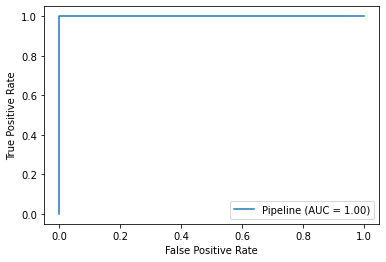

In [50]:
plot_roc_curve(pip_line_dectree, X_train, y_train);

In [51]:
# using pipiline to make Decision Tree model with hyper-tuning 
pip_line_dectree1 = Pipeline([
    ('Geography_ohe', ColumnTransformer([
        ('onehotencoding', OneHotEncoder
         (sparse=False, handle_unknown='ignore'),
         ['Geography'])
    ], remainder='passthrough')),
    ('scaler', StandardScaler()),
    ('sampling', RandomOverSampler(random_state=42)),
    ('dt1', DecisionTreeClassifier
     (criterion='entropy', splitter='random', max_depth=3, class_weight='balanced'))
])

In [52]:
# fitting model(pipeline) into train set
pip_line_dectree1.fit(X_train, y_train)

Pipeline(steps=[('Geography_ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('sampling', RandomOverSampler(random_state=42)),
                ('dt1',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=3,
                                        splitter='random'))])

In [53]:
# getting the average of f1 score
cross_val_score(pip_line_dectree1, X_train, y_train, cv=3, scoring='f1').mean()

0.4822042715198838

In [54]:
# checking the accuracy score
cross_val_score(pip_line_dectree1, X_train, y_train, cv=3, scoring='accuracy')

array([0.74390701, 0.75590551, 0.71980495])

In [55]:
# using helper function to predict 
model_output(pip_line_dectree1, X_train, X_test, y_train, y_test)

The Cross Val f1 score is: 0.5112046933242019
The test Accuracy is: 0.7585
[[1287  320]
 [ 163  230]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1607
           1       0.42      0.59      0.49       393

    accuracy                           0.76      2000
   macro avg       0.65      0.69      0.66      2000
weighted avg       0.80      0.76      0.77      2000



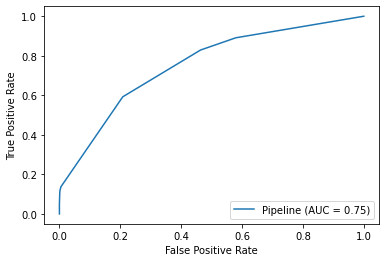

In [56]:
plot_roc_curve(pip_line_dectree1, X_train, y_train);

# Grid Search for Decision Tree
- In last model, I saw overfitting with low f1 score, even after hyper tuning the model didn’t show its best performance .
-  Grid search approaches to hyperparameter tuning that will automatically  build and evaluate a model for each combination of algorithm parameters specified in a grid.


In [57]:
# using Grid Search function to Hyper-tun Parameters
param_grid = {'dt1__class_weight': ['balanced'],
             'dt1__splitter': ['best'],
             'dt1__max_depth': (21, 22, 23, 24, 25),
             'dt1__min_impurity_decrease':[.01, .02, .03, .04]}

grid_search_dectree1 =GridSearchCV(pip_line_dectree1,param_grid=param_grid,cv=3, scoring='f1', n_jobs=-1)

In [58]:
# fitting model(pipeline) into train set
grid_search_dectree1.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Geography_ohe',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoding',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Geography'])])),
                                       ('scaler', StandardScaler()),
                                       ('sampling',
                                        RandomOverSampler(random_state=42)),
                                       ('dt1',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               criterion='entropy',
                           

In [59]:
# getting the best estimators
grid_search_dectree1.best_estimator_

Pipeline(steps=[('Geography_ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('sampling', RandomOverSampler(random_state=42)),
                ('dt1',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=21,
                                        min_impurity_decrease=0.01))])

In [60]:
# best f1 score
grid_search_dectree1.best_score_

0.5533733050168893

In [61]:
# best f1 score predict
f1_score(y_train, grid_search_dectree1.best_estimator_.predict(X_train))

0.5464089716058219

In [62]:
# using helper function to predict 
model_output(grid_search_dectree1, X_train, X_test, y_train, y_test)

The Cross Val f1 score is: 0.5533733050168893
The test Accuracy is: 0.7545
[[1228  379]
 [ 112  281]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1607
           1       0.43      0.72      0.53       393

    accuracy                           0.75      2000
   macro avg       0.67      0.74      0.68      2000
weighted avg       0.82      0.75      0.77      2000



## Random Forest models
- After using Grid Search, the f1 score didn’t improve much that I expected.
- I use Random Forest, because it creates as many trees on the subset of the data and combines the output of all the trees. In this way it reduces overfitting problem in decision trees and also reduces the variance.
- Random Forest works well with both categorical and numerical variables.

In [63]:
# using pipiline to make Random Forest model
pip_line_rf = Pipeline([
    ('Geography_ohe', ColumnTransformer([
        ('onehotencoding', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Geography'])
    ], remainder='passthrough')),
    ('scaler', StandardScaler()),
    ('sampling', RandomOverSampler(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

In [64]:
# fitting model(pipeline) into train set
pip_line_rf.fit(X_train, y_train)

Pipeline(steps=[('Geography_ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('sampling', RandomOverSampler(random_state=42)),
                ('rf', RandomForestClassifier(random_state=42))])

In [65]:
# getting the average of f1 score
cross_val_score(pip_line_rf, X_train, y_train, cv=3, scoring='f1').mean()

0.6017686728771269

In [66]:
# checking the accuracy score
cross_val_score(pip_line_rf, X_train, y_train, cv=3, scoring='accuracy')

array([0.85564304, 0.85714286, 0.84996249])

In [67]:
# using helper function to predict 
model_output(pip_line_rf, X_train, X_test, y_train, y_test)

The Cross Val f1 score is: 0.6017686728771269
The test Accuracy is: 0.858
[[1500  107]
 [ 177  216]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.67      0.55      0.60       393

    accuracy                           0.86      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



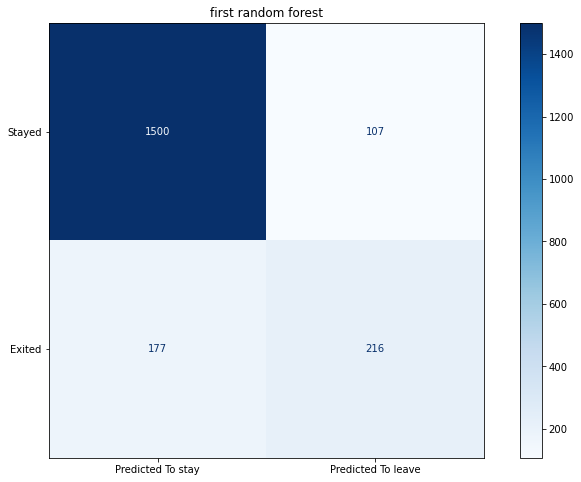

In [68]:
confusion_matrix_info(pip_line_rf, X_test, y_test, 'first random forest');

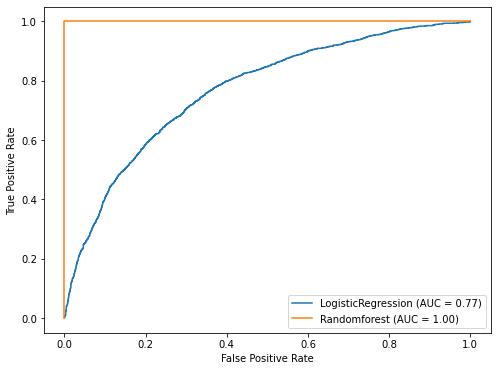

In [69]:
fig, ax = plt.subplots(figsize=(8,6))


plot_roc_curve(pip_line_lg, X_train, y_train, ax=ax, name='LogisticRegression' )
plot_roc_curve(pip_line_rf, X_train, y_train, ax=ax, name='Randomforest');


In [70]:
# using pipiline to make Random Forest model with hyper tuning 
pip_line_rf1 = Pipeline([
    ('Geography_ohe', ColumnTransformer([
        ('onehotencoding', OneHotEncoder
         (sparse=False, handle_unknown='ignore'),
         ['Geography'])
    ], remainder='passthrough')),
    ('scaler', StandardScaler()),
    ('sampling', RandomOverSampler(random_state=42)),
    ('rf1', RandomForestClassifier
     (criterion='gini', random_state=42,class_weight='balanced' ))
])

In [71]:
# fitting model(pipeline) into train set
pip_line_rf1.fit(X_train, y_train)

Pipeline(steps=[('Geography_ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('sampling', RandomOverSampler(random_state=42)),
                ('rf1',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [72]:
# getting the average of f1 score
cross_val_score(pip_line_rf1, X_train, y_train, cv=3, scoring='f1').mean()

0.6017686728771269

In [73]:
# checking the accuracy score
cross_val_score(pip_line_rf1, X_train, y_train, cv=3, scoring='accuracy')

array([0.85564304, 0.85714286, 0.84996249])

In [74]:
# using helper function to predict 
model_output(pip_line_rf1, X_train, X_test, y_train, y_test)

The Cross Val f1 score is: 0.6017686728771269
The test Accuracy is: 0.858
[[1500  107]
 [ 177  216]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.67      0.55      0.60       393

    accuracy                           0.86      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



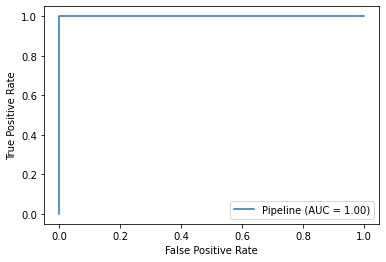

In [75]:
plot_roc_curve(pip_line_rf1, X_train, y_train);

# Grid Search for Random Forest
- The Random Forest model showed significant improvement in f1 score which I expected to see. 
- Again, I used Grid Search to find the best parameter for Random Forest model and get the best score out of this model.

In [76]:
# using Grid Search function to Hyper-tun Parameters
param_grid = { 'rf1__criterion': ['gini', 'entropy'],'rf1__max_depth': [2,5,10],'rf1__n_estimators': [100, 1000]}

grid_search_rf =GridSearchCV(pip_line_rf1,param_grid=param_grid,cv=3, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train,y_train)# fiiting model into training set

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Geography_ohe',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoding',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Geography'])])),
                                       ('scaler', StandardScaler()),
                                       ('sampling',
                                        RandomOverSampler(random_state=42)),
                                       ('rf1',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
   

In [77]:
# getting the best estimator
grid_search_rf.best_estimator_

Pipeline(steps=[('Geography_ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('sampling', RandomOverSampler(random_state=42)),
                ('rf1',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        n_estimators=1000, random_state=42))])

In [78]:
# getting the best score 
grid_search_rf.best_score_

0.6179687984707218

In [79]:
# predicting the f1 score 
f1_score(y_train, grid_search_rf.best_estimator_.predict(X_train))

0.7843137254901962

In [80]:
# using helper function to predict 
model_output(grid_search_rf, X_train, X_test, y_train, y_test)

The Cross Val f1 score is: 0.6174563801157579
The test Accuracy is: 0.8355
[[1392  215]
 [ 114  279]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1607
           1       0.56      0.71      0.63       393

    accuracy                           0.84      2000
   macro avg       0.74      0.79      0.76      2000
weighted avg       0.85      0.84      0.84      2000



-----

# XGBoost
- Although I got good score out of Random Forest model, it was slow  to run the train set. 
- I use XGBoost to see if I get better or the same score in better computational speed.
- XGBoost has in-built L1 (Lasso Regression) and L2 (Ridge Regression) regularization which prevents the model from overfitting.
- XGBoost allows user to run a cross-validation at each iteration of the boosting process.


In [81]:
# using pipiline to make XGBoost model 
pip_line_xgb = Pipeline([
    ('Geography_ohe', ColumnTransformer([
        ('onehotencoding', OneHotEncoder
         (sparse=False, handle_unknown='ignore'),
         ['Geography'])
    ], remainder='passthrough')),
    ('scaler', StandardScaler()),
    ('sampling', RandomOverSampler(random_state=42)),
    ('xgb', XGBClassifier() )
])

In [82]:
# fitting model(pipeline) into train set
pip_line_xgb.fit(X_train, y_train)

Pipeline(steps=[('Geography_ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('sampling', RandomOverSampler(random_state=42)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsa..., gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
         

In [83]:
# getting the average of f1 score
cross_val_score(pip_line_xgb, X_train, y_train, cv=3, scoring='f1').mean()

0.5829216775216821

In [84]:
# checking the accuracy score
cross_val_score(pip_line_xgb, X_train, y_train, cv=3, scoring='accuracy')

array([0.83352081, 0.83352081, 0.81995499])

In [85]:
# using helper function to predict 
model_output(pip_line_xgb, X_train, X_test, y_train, y_test)

The Cross Val f1 score is: 0.5829216775216821
The test Accuracy is: 0.828
[[1399  208]
 [ 136  257]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1607
           1       0.55      0.65      0.60       393

    accuracy                           0.83      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.84      0.83      0.83      2000



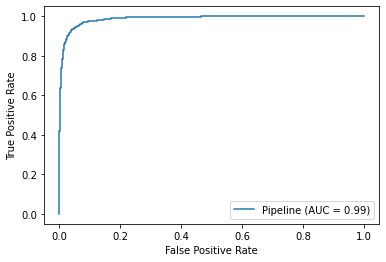

In [86]:
plot_roc_curve(pip_line_xgb, X_train, y_train);

# Grid Search for XGBoost
- Using Grid Search to find the best parameters as best estimatos and use those parameters to get the best f1 score.

In [87]:
# using Grid Search function to Hyper-tun Parameters
param_grid = {
    'xgb__max_depth': [2, 10, 1],
    'xgb__n_estimators': [60, 220, 40],
    'xgb__learning_rate': [0.1, 0.01, 0.05]
}

grid_search_xgb =GridSearchCV(pip_line_xgb,param_grid=param_grid,cv=3, scoring='f1', n_jobs=-1)

In [88]:
# fitting model(pipeline) into train set
grid_search_xgb.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Geography_ohe',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoding',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Geography'])])),
                                       ('scaler', StandardScaler()),
                                       ('sampling',
                                        RandomOverSampler(random_state=42)),
                                       ('xgb',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      col

In [89]:
# getting the best estimators
grid_search_xgb.best_estimator_

Pipeline(steps=[('Geography_ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('sampling', RandomOverSampler(random_state=42)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsa..., gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
        

In [90]:
# best f1 score
grid_search_xgb.best_score_

0.6031862264356543

In [91]:
# best f1 score predict
f1_score(y_train, grid_search_xgb.best_estimator_.predict(X_train))

0.6268878435256251

In [92]:
# using helper function to predict 
model_output(grid_search_xgb, X_train, X_test, y_train, y_test)

The Cross Val f1 score is: 0.5989522298770358
The test Accuracy is: 0.8095
[[1305  302]
 [  79  314]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1607
           1       0.51      0.80      0.62       393

    accuracy                           0.81      2000
   macro avg       0.73      0.81      0.75      2000
weighted avg       0.86      0.81      0.82      2000



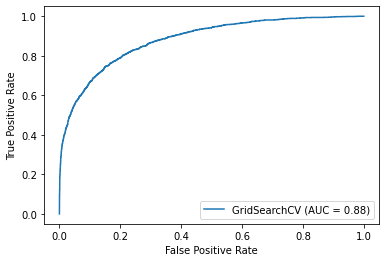

In [93]:
plot_roc_curve(grid_search_xgb, X_train, y_train);

In [94]:
# using pipiline to make XGBoost model with hyper-tuning 
pip_line_xgb1 = Pipeline([
    ('Geography_ohe', ColumnTransformer([
        ('onehotencoding', OneHotEncoder
         (sparse=False, handle_unknown='ignore'),
         ['Geography'])
    ], remainder='passthrough')),
    ('scaler', StandardScaler()),
    ('sampling', RandomOverSampler(random_state=42)),
    ('xgb1', XGBClassifier(scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=3, 
                      gamma=10))
])

In [95]:
# fitting model(pipeline) into train set
pip_line_xgb1.fit(X_train, y_train)

Pipeline(steps=[('Geography_ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('sampling', RandomOverSampler(random_state=42)),
                ('xgb1',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               cols...10, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=nan,
              

In [96]:
# getting the average of f1 score
cross_val_score(pip_line_xgb1, X_train, y_train, cv=3, scoring='f1').mean()

0.6014559892337052

In [97]:
# checking the accuracy score
cross_val_score(pip_line_xgb1, X_train, y_train, cv=3, scoring='accuracy')

array([0.80089989, 0.7960255 , 0.79144786])

In [98]:
# using helper function to predict 
model_output(pip_line_xgb1, X_train, X_test, y_train, y_test)

The Cross Val f1 score is: 0.6014559892337052
The test Accuracy is: 0.8045
[[1296  311]
 [  80  313]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1607
           1       0.50      0.80      0.62       393

    accuracy                           0.80      2000
   macro avg       0.72      0.80      0.74      2000
weighted avg       0.86      0.80      0.82      2000



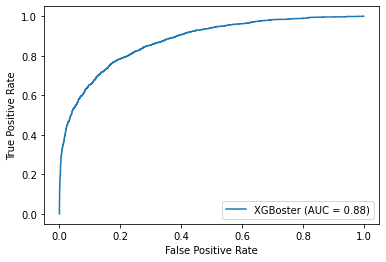

In [99]:
plot_roc_curve(pip_line_xgb1, X_train, y_train, name='XGBoster');

In [100]:
# using pipiline to make XGBoost model with hyper-tuning 
pip_line_xgb2 = Pipeline([
    ('Geography_ohe', ColumnTransformer([
        ('onehotencoding', OneHotEncoder
         (sparse=False, handle_unknown='ignore'),
         ['Geography'])
    ], remainder='passthrough')),
    ('scaler', StandardScaler()),
    ('sampling', RandomOverSampler(random_state=42)),
    ('xgb2', XGBClassifier(scale_pos_weight=1,
                      learning_rate=0.1,  
                      colsample_bytree = 0.3,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=3, 
                      gamma=0))
])

In [101]:
# fitting model(pipeline) into train set
pip_line_xgb2.fit(X_train, y_train)

Pipeline(steps=[('Geography_ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('sampling', RandomOverSampler(random_state=42)),
                ('xgb2',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               cols...a=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=nan,
              

In [102]:
# getting the average of f1 score
cross_val_score(pip_line_xgb2, X_train, y_train, cv=3, scoring='f1').mean()

0.5924046434321384

In [103]:
# checking the accuracy score
cross_val_score(pip_line_xgb2, X_train, y_train, cv=3, scoring='accuracy').mean()

0.8107493690070436

In [104]:
# using helper function to predict 
model_output(pip_line_xgb2, X_train, X_test, y_train, y_test)

The Cross Val f1 score is: 0.5924046434321384
The test Accuracy is: 0.8125
[[1345  262]
 [ 113  280]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1607
           1       0.52      0.71      0.60       393

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.84      0.81      0.82      2000



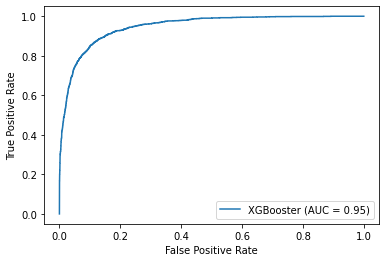

In [105]:
plot_roc_curve(pip_line_xgb2, X_train, y_train, name='XGBooster');

-----

# test set and the Best model
- Although Random forest does not have the best computational speed and it takes more time to run compare to other models, it gave me the best f1 score.
- I use Random Forest model with Grid Search as my best model.

In [106]:
# using the best model to make the final model
# fit the model again
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Geography_ohe',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoding',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Geography'])])),
                                       ('scaler', StandardScaler()),
                                       ('sampling',
                                        RandomOverSampler(random_state=42)),
                                       ('rf1',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
   

In [107]:
# make prediction on test set
grid_search_rf.predict(X_test)

array([0, 0, 0, ..., 1, 0, 1])

In [108]:
# using the predict of test set
y_hat_test = grid_search_rf.predict(X_test)

In [109]:
# getting the f1 score on test set
f1_score(y_test, y_hat_test)

0.629086809470124

In [110]:
accuracy_score(y_test, y_hat_test)

0.8355

In [111]:
# using helper function to predict 
model_output(grid_search_rf, X_train, X_test, y_train, y_test)

The Cross Val f1 score is: 0.6174563801157579
The test Accuracy is: 0.8355
[[1392  215]
 [ 114  279]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1607
           1       0.56      0.71      0.63       393

    accuracy                           0.84      2000
   macro avg       0.74      0.79      0.76      2000
weighted avg       0.85      0.84      0.84      2000



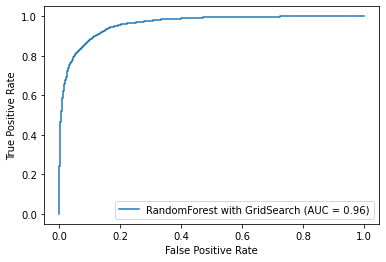

In [120]:
plot_roc_curve(grid_search_rf, X_train, y_train, name='RandomForest with GridSearch');

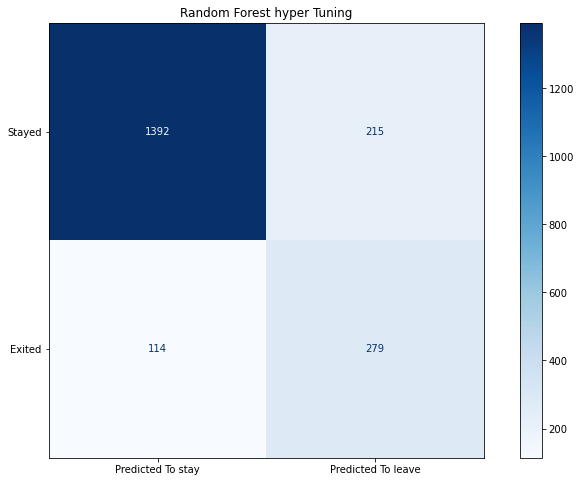

<Figure size 432x288 with 0 Axes>

In [118]:
confusion_matrix_info(grid_search_rf, X_test, y_test, 'Random Forest hyper Tuning');
plt.savefig('final random forest')